In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
# Overview of the data
print("Data Overview:")
print(df.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  m

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340

In [9]:
# Check basic statistics for numeric and categorical features
print("\nDescriptive Statistics (Numeric):")
print(df.describe())
print("\nDescriptive Statistics (Categorical):")
print(df.describe(include='object'))


Descriptive Statistics (Numeric):
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%     

In [10]:
# EDA

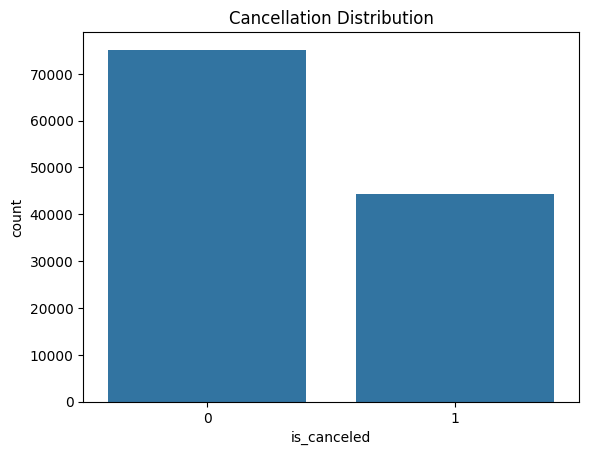

In [11]:
# Visualize the cancellation rate
sns.countplot(x=df['is_canceled'])
plt.title('Cancellation Distribution')
plt.show()

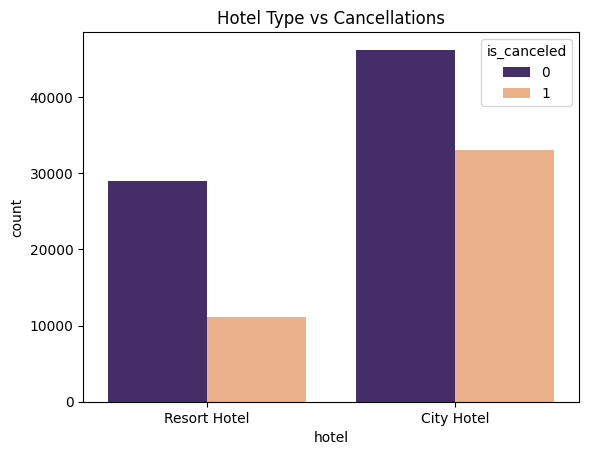

In [12]:
# Visualize booking types across hotel types
sns.countplot(x='hotel', hue='is_canceled', data=df, palette=['#432371', "#FAAE7B"])
plt.title("Hotel Type vs Cancellations")
plt.show()

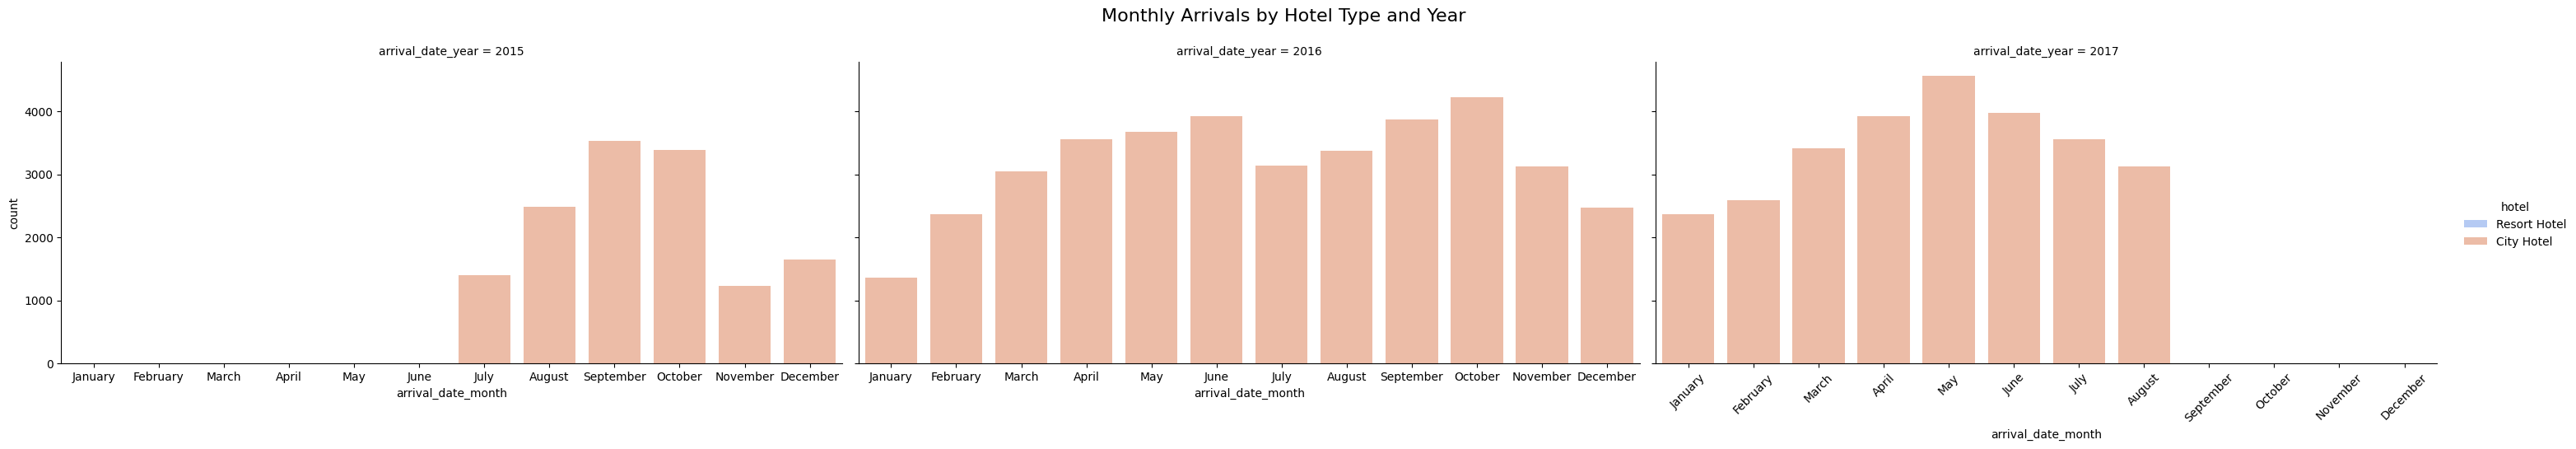

In [14]:
# Define the correct order of months for plotting
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure 'arrival_date_month' is treated as a categorical variable with the correct order
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Create the FacetGrid for monthly booking trends across hotel types and years
g = sns.FacetGrid(df, col='arrival_date_year', height=5, aspect=2, hue='hotel', palette="coolwarm")
g.map(sns.countplot, 'arrival_date_month', order=month_order).add_legend()

# Adjust layout and add labels
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Monthly Arrivals by Hotel Type and Year', fontsize=16)
plt.xticks(rotation=45)
plt.show()

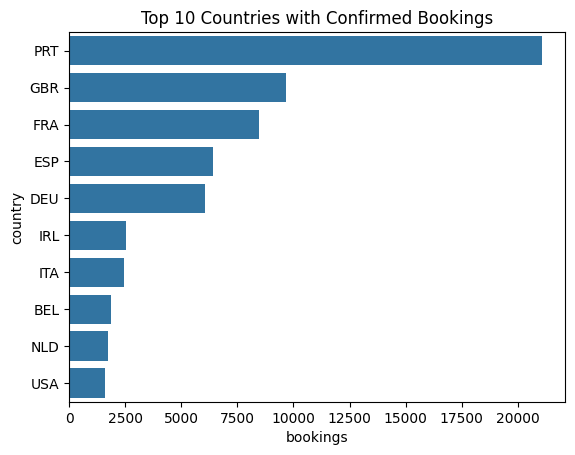

In [15]:
# Top 10 countries with confirmed bookings
bookings_confirmed = df[df['is_canceled'] == 0]
df_country = bookings_confirmed.groupby('country').size().nlargest(10).reset_index(name='bookings')
sns.barplot(x='bookings', y='country', data=df_country)
plt.title('Top 10 Countries with Confirmed Bookings')
plt.show()

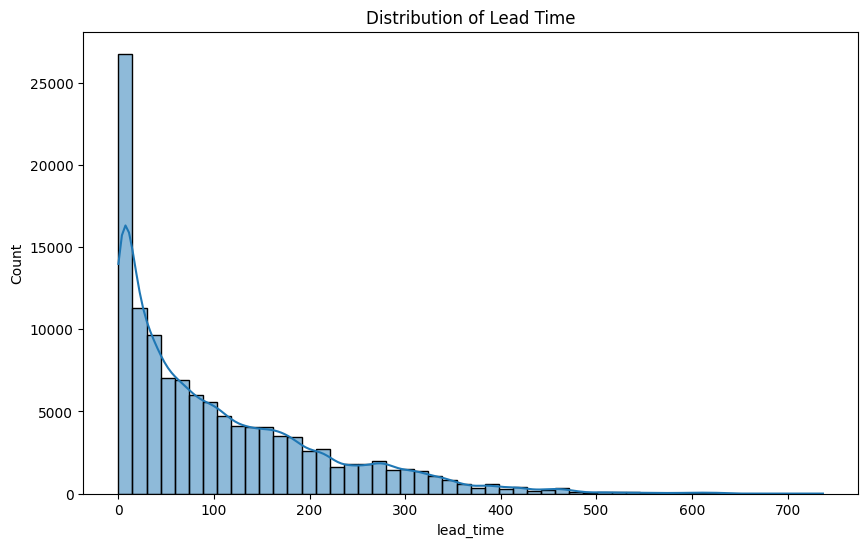

In [16]:
# Visualize lead time distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Distribution of Lead Time')
plt.show()

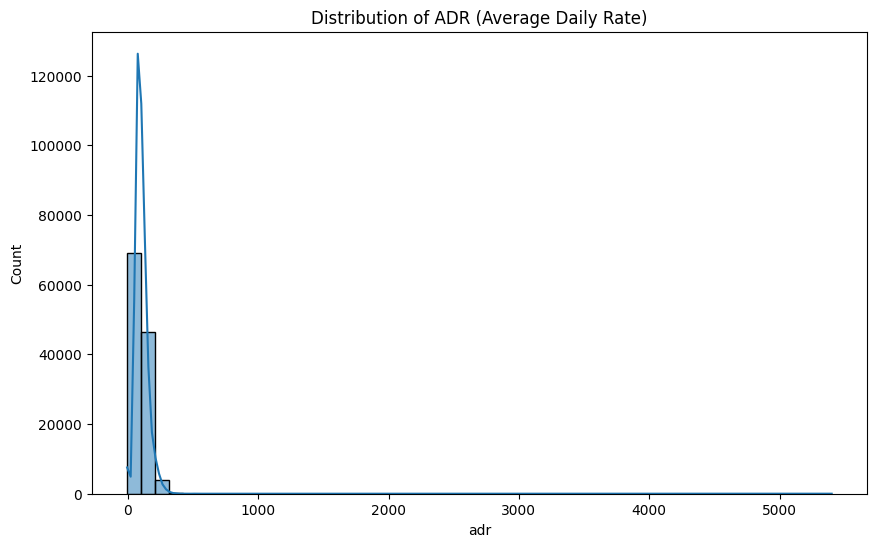

In [17]:
# Analyze the distribution of average daily rate (ADR)
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=50, kde=True)
plt.title('Distribution of ADR (Average Daily Rate)')
plt.show()

In [18]:
# Data Preprocessing and Feature Engineering

In [19]:
# Handle missing values
df['agent'].fillna(0, inplace=True)
df['children'].fillna(df['children'].median(), inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [20]:
# Drop 'company' column due to excessive missing values
df.drop(columns=['company'], inplace=True)

In [21]:
# Convert 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [22]:
# Feature Engineering: Create new feature for total customers (adults + children + babies)
df["total_customers"] = df["adults"] + df["children"] + df["babies"]

In [23]:
# Drop individual 'adults', 'babies', 'children' columns after summing
df.drop(columns=['adults', 'children', 'babies'], inplace=True)

In [24]:
# Map 'hotel' feature to binary
df['hotel'] = df['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})

# Map month names to numeric values
df['arrival_date_month'] = df['arrival_date_month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 
    'November': 11, 'December': 12})

In [25]:
# Label encoding for 'country' using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['country_encoded'] = le.fit_transform(df['country'])

In [26]:
# Convert remaining categorical variables using categorical codes
categorical_columns = ['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
for col in categorical_columns:
    df[col] = pd.Categorical(df[col]).codes

In [27]:
# Check the cleaned data
print("\nData After Cleaning and Feature Engineering:")
print(df.info())


Data After Cleaning and Feature Engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  int64         
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  category      
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   meal                            119390 non-null  int8          
 10  country   

In [32]:
df.drop('country', axis=1, inplace=True)

In [33]:
# Hypothesis Testing

In [34]:
# Hypothesis 1: Lead time above 6 months impacts cancellations

In [35]:
# Create a binary variable for lead time > 6 months
df['lead_time_above_6_months'] = df['lead_time'] > 180

# Chi-Square Test
lead_time_cancellation_table = pd.crosstab(df['lead_time_above_6_months'], df['is_canceled'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(lead_time_cancellation_table)
print(f"Chi2 Statistic: {chi2_stat}, P-value: {p_val}")

Chi2 Statistic: 5321.73290110073, P-value: 0.0


In [36]:
# Hypothesis 2: ADR (Average Daily Rate) differs between weekdays and weekends

In [37]:
# Create a binary variable for weekdays
df['is_weekday'] = df['stays_in_week_nights'] > 0

# T-test for ADR comparison
adr_weekday = df[df['is_weekday']]['adr']
adr_weekend = df[~df['is_weekday']]['adr']
t_stat, p_val_ttest = stats.ttest_ind(adr_weekday, adr_weekend, equal_var=False)
print(f"T-Statistic: {t_stat}, P-value: {p_val_ttest}")

T-Statistic: 23.87187658931579, P-value: 4.884863041188145e-122


In [38]:
# Predictive Modeling

In [41]:
# Preparing the dataset for modeling
X = df.drop(columns=['is_canceled', 'reservation_status_date'])
y = df['is_canceled']

In [42]:
# Convert remaining categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [43]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Predictions and Evaluation
y_pred = rf_model.predict(X_test)

In [46]:
# Evaluate performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9999162408911969

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



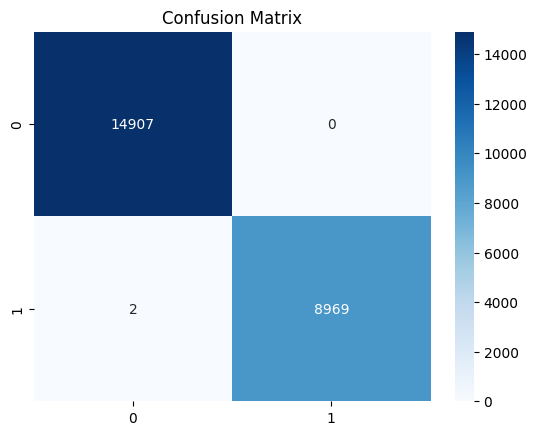

In [47]:
# Confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [64]:
# Logistic Regression model
log_reg = LogisticRegression(max_iter=500)  # Increase max_iter if needed 
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [65]:
# Predictions
y_pred_logreg = log_reg.predict(X_test)

In [66]:
# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9780132339391909
[[14828    79]
 [  446  8525]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14907
           1       0.99      0.95      0.97      8971

    accuracy                           0.98     23878
   macro avg       0.98      0.97      0.98     23878
weighted avg       0.98      0.98      0.98     23878



In [57]:
# XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [58]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)

In [59]:
# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 1.0
[[14907     0]
 [    0  8971]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [61]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
# Predictions
y_pred_knn = knn.predict(X_test)

In [63]:
# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8076053270793199
[[12934  1973]
 [ 2621  6350]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     14907
           1       0.76      0.71      0.73      8971

    accuracy                           0.81     23878
   macro avg       0.80      0.79      0.79     23878
weighted avg       0.81      0.81      0.81     23878



Conclusion:
While Random Forest and XGBoost are performing with near-perfect accuracy, this likely indicates overfitting or data leakage.

To address this, you should apply cross-validation, check for leakage, and tune hyperparameters.
    
Logistic Regression is a strong baseline model with good performance, and regularization might help refine it further.

KNN underperforms, and without improvements like tuning k or scaling features, it's less suitable for this problem.

By applying these improvements, you can enhance model generalization, avoid overfitting, and achieve more reliable predictions for hotel booking cancellations.